In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls ../data/raw/

TsaThroughput.ANC.csv   TsaThroughput.FLL.csv   TsaThroughput.PHX.csv
TsaThroughput.ATL.csv   TsaThroughput.LAS.csv   TsaThroughput.SEA.csv
TsaThroughput.All.csv   TsaThroughput.LAX.csv   TsaThroughput.SFO.csv
TsaThroughput.BOI.csv   TsaThroughput.MCO.csv   TsaThroughput.SJC.csv
TsaThroughput.BZN.csv   TsaThroughput.MIA.csv   TsaThroughput.TPA.csv
TsaThroughput.DEN.csv   TsaThroughput.MSO.csv   TsaThroughput.Total.csv
TsaThroughput.DFW.csv   TsaThroughput.PDX.csv


In [3]:
airports_list = ['ANC', 'ATL', 'All', 'BOI', 'BZN', 'DEN', 'DFW', 'FLL', 'LAS', 'LAX', 
                 'MCO', 'MIA', 'PDX', 'PHX', 'SEA', 'SFO', 'SJC', 'TPA']

In [4]:
df_list = []
  
for i in range(len(airports_list)):
    temp_df = pd.read_csv("../data/raw/TsaThroughput."+airports_list[i]+".csv")
    df_list.append(temp_df)

In [5]:
airport_dict =dict(zip(airports_list,df_list))

In [6]:
# Clean and plot a timeseries for a given airport

def make_airport_df(df, airport_name):
    '''For each airport, creates dataframe sets index to datetime, 
    sum over values for all gates drops unnecessary columns'''

    # Set index to datetime
    df.index = pd.to_datetime(df['Date'] + ' ' + df['Hour'])
    df = df.drop(columns=['Date', 'Hour'])
    
    # Sum across values from each gate to get total for a given date and time (up to the hour)
    df = pd.DataFrame(df.sum(axis=1))
    df.rename(columns={0:airport_name}, inplace=True)
    
    return df

In [7]:
def join_airports(airport_list):
    new=[]
    for airport in airport_list: 
        new.append(make_airport_df(airport_dict.get(airport), airport))
        airports = pd.concat(new, axis=1)
    return airports

In [73]:
df = join_airports(airports_list)
df.head()

,ANC,ATL,All,BOI,BZN,DEN,DFW,FLL,LAS,LAX,MCO,MIA,PDX,PHX,SEA,SFO,SJC,TPA
2018-12-30 00:00:00,115.0,11.0,5079.0,NaN,NaN,123.0,NaN,0.0,343.0,533.0,NaN,283.0,14.0,389.0,50.0,318.0,NaN,1.0
2018-12-30 01:00:00,14.0,14.0,2918.0,NaN,NaN,52.0,NaN,147.0,84.0,11.0,NaN,290.0,11.0,64.0,12.0,7.0,NaN,NaN
2018-12-30 02:00:00,29.0,10.0,3004.0,NaN,NaN,19.0,NaN,NaN,60.0,NaN,NaN,314.0,24.0,16.0,110.0,NaN,NaN,NaN
2018-12-30 03:00:00,115.0,216.0,19319.0,NaN,25.0,353.0,351.0,396.0,762.0,474.0,535.0,704.0,527.0,524.0,717.0,195.0,35.0,20.0
2018-12-30 04:00:00,305.0,1308.0,121141.0,483.0,331.0,3006.0,2140.0,3217.0,3189.0,3778.0,3501.0,1796.0,1778.0,1919.0,3114.0,2361.0,420.0,2267.0


In [74]:
df = df.drop(columns=['All'])

In [54]:
df.head()

,ANC,ATL,BOI,BZN,DEN,DFW,FLL,LAS,LAX,MCO,MIA,PDX,PHX,SEA,SFO,SJC,TPA
2018-12-30 00:00:00,115.0,11.0,NaN,NaN,123.0,NaN,0.0,343.0,533.0,NaN,283.0,14.0,389.0,50.0,318.0,NaN,1.0
2018-12-30 01:00:00,14.0,14.0,NaN,NaN,52.0,NaN,147.0,84.0,11.0,NaN,290.0,11.0,64.0,12.0,7.0,NaN,NaN
2018-12-30 02:00:00,29.0,10.0,NaN,NaN,19.0,NaN,NaN,60.0,NaN,NaN,314.0,24.0,16.0,110.0,NaN,NaN,NaN
2018-12-30 03:00:00,115.0,216.0,NaN,25.0,353.0,351.0,396.0,762.0,474.0,535.0,704.0,527.0,524.0,717.0,195.0,35.0,20.0
2018-12-30 04:00:00,305.0,1308.0,483.0,331.0,3006.0,2140.0,3217.0,3189.0,3778.0,3501.0,1796.0,1778.0,1919.0,3114.0,2361.0,420.0,2267.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27216 entries, 2018-12-30 00:00:00 to 2022-02-05 23:00:00
Freq: H
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANC     26985 non-null  float64
 1   ATL     26513 non-null  float64
 2   BOI     19626 non-null  float64
 3   BZN     17779 non-null  float64
 4   DEN     27186 non-null  float64
 5   DFW     24839 non-null  float64
 6   FLL     23792 non-null  float64
 7   LAS     27215 non-null  float64
 8   LAX     25785 non-null  float64
 9   MCO     24941 non-null  float64
 10  MIA     27211 non-null  float64
 11  PDX     27206 non-null  float64
 12  PHX     27215 non-null  float64
 13  SEA     27214 non-null  float64
 14  SFO     25581 non-null  float64
 15  SJC     20325 non-null  float64
 16  TPA     21527 non-null  float64
dtypes: float64(17)
memory usage: 3.7 MB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ANC,26985.0,210.573967,154.729967,0.0,95.0,180.0,287.0,1094.0
ATL,26513.0,2148.751198,1829.063290,0.0,267.0,1912.0,3609.0,8202.0
BOI,19626.0,270.544966,199.508061,0.0,104.0,245.0,397.0,1292.0
BZN,17779.0,139.272962,128.619313,0.0,43.0,103.0,196.0,830.0
DEN,27186.0,1949.017527,1586.510462,0.0,393.0,1758.0,3328.0,6642.0
DFW,24839.0,1994.838661,1540.055232,0.0,440.0,1888.0,3265.0,6770.0
FLL,23792.0,1784.690232,1197.076639,0.0,653.0,1883.0,2743.0,5507.0
LAS,27215.0,1948.071835,1508.062165,0.0,466.5,1816.0,3158.0,6385.0
LAX,25785.0,3097.091061,2323.019113,0.0,992.0,2751.0,4928.0,10250.0
MCO,24941.0,2273.608476,1717.449356,0.0,441.0,2304.0,3848.0,6973.0


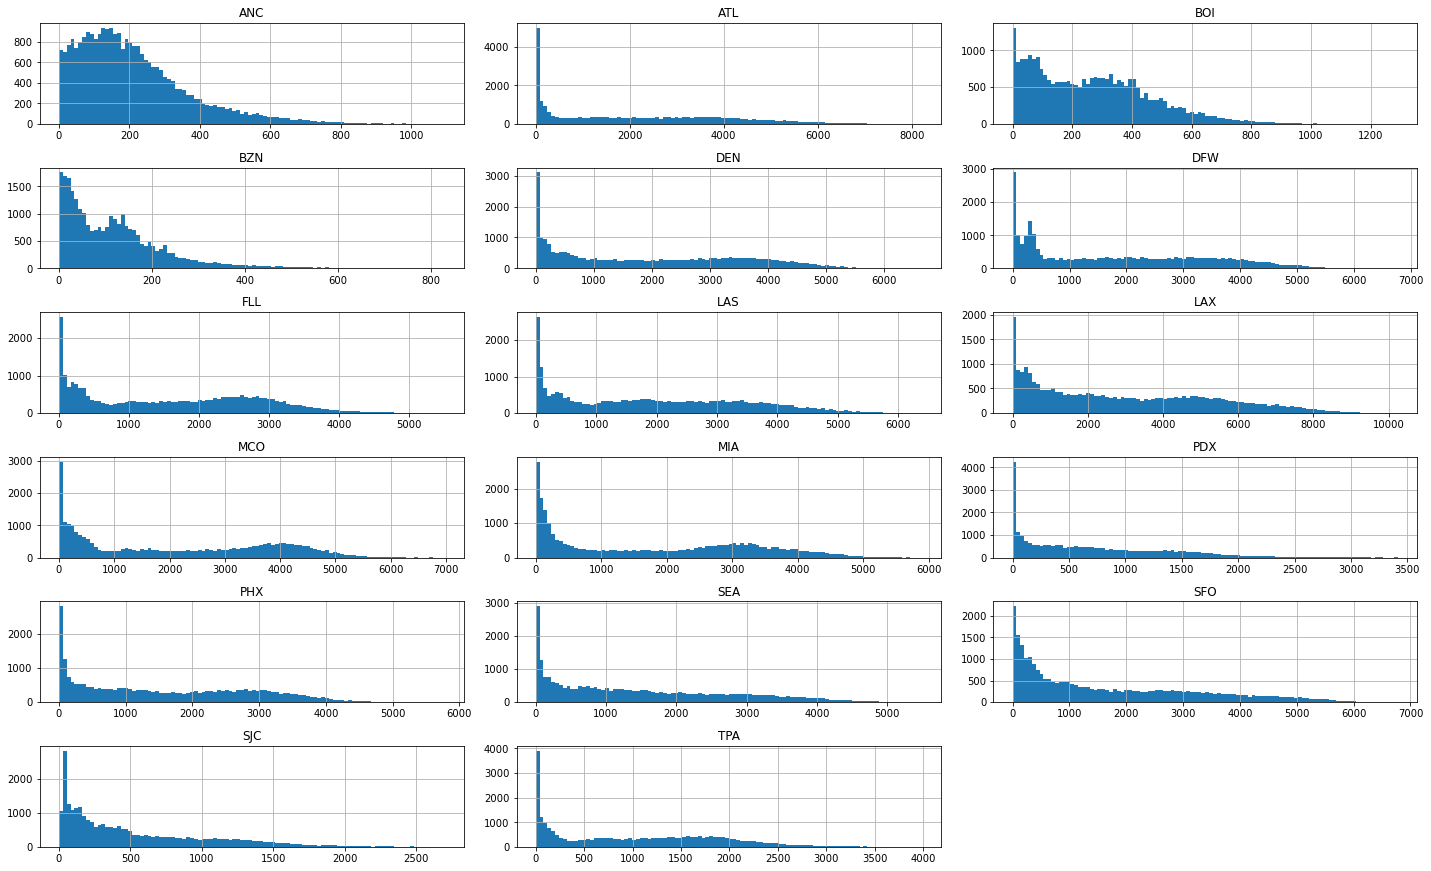

In [87]:
df.hist(figsize=(20,20), layout=(10,3), bins=100)
plt.tight_layout();

In [76]:
df['ANC'].value_counts().head()

166.0    100
81.0     100
121.0     99
111.0     98
135.0     96
Name: ANC, dtype: int64

In [77]:
df['ATL'].value_counts().head()

0.0    220
3.0    140
1.0    138
2.0    137
5.0    110
Name: ATL, dtype: int64

In [78]:
df['BZN'].value_counts().head()

2.0     146
1.0     146
6.0     125
38.0    120
24.0    118
Name: BZN, dtype: int64

In [79]:
df['SFO'].value_counts().head()

0.0    219
1.0    108
2.0     79
3.0     56
5.0     54
Name: SFO, dtype: int64

In [80]:
df['SJC'].value_counts().head()

44.0    51
37.0    49
46.0    49
43.0    48
38.0    47
Name: SJC, dtype: int64

In [81]:
null_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['count'])
null_values['percent'] = round(df.isna().mean()*100, 2)
null_values

,count,percent
BZN,9437,34.67
BOI,7590,27.89
SJC,6891,25.32
TPA,5689,20.90
FLL,3424,12.58
DFW,2377,8.73
MCO,2275,8.36
SFO,1635,6.01
LAX,1431,5.26
ATL,703,2.58


In [88]:
df = df.fillna(0)

In [89]:
df.isna().any()

ANC    False
ATL    False
BOI    False
BZN    False
DEN    False
DFW    False
FLL    False
LAS    False
LAX    False
MCO    False
MIA    False
PDX    False
PHX    False
SEA    False
SFO    False
SJC    False
TPA    False
dtype: bool

In [90]:
df['ATL'].value_counts().head()

0.0    224
3.0    153
1.0    151
2.0    146
9.0    116
Name: ATL, dtype: int64

In [91]:
df.duplicated().any()

False

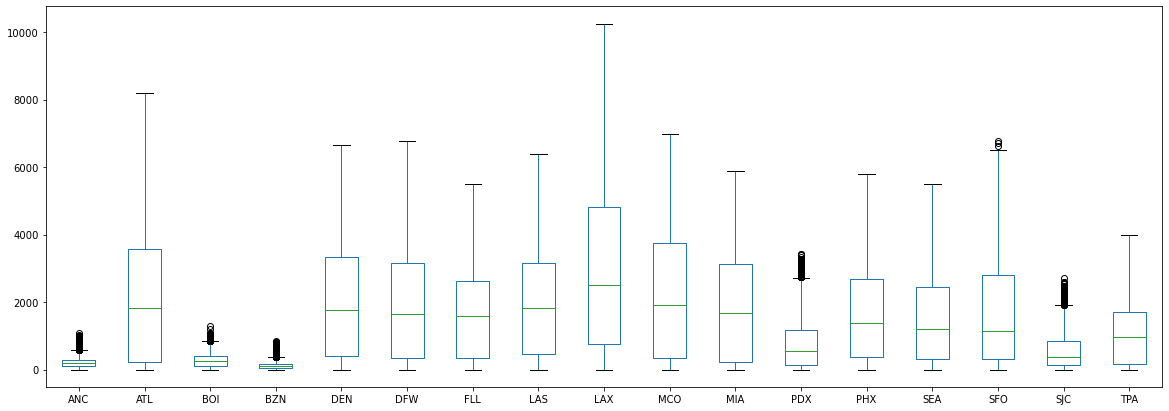

In [92]:
df.boxplot(figsize=(20,7),grid=False);

In [93]:
def plot_timeseries(series, figsize=(20,8), cmap=None):
    ax = series.plot(figsize=figsize, cmap=cmap)
    ax.set_xlabel('Date')
    ax.set_ylabel('Throughput (count)')
    ax.set_title('TSA Throughput Timeseries')
    plt.show()

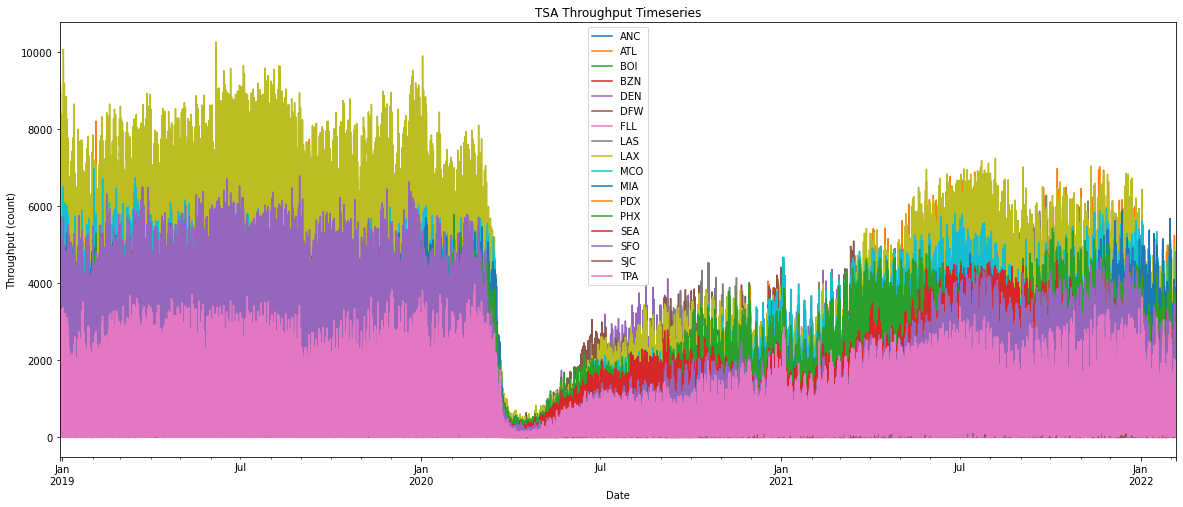

In [94]:
plot_timeseries(df)

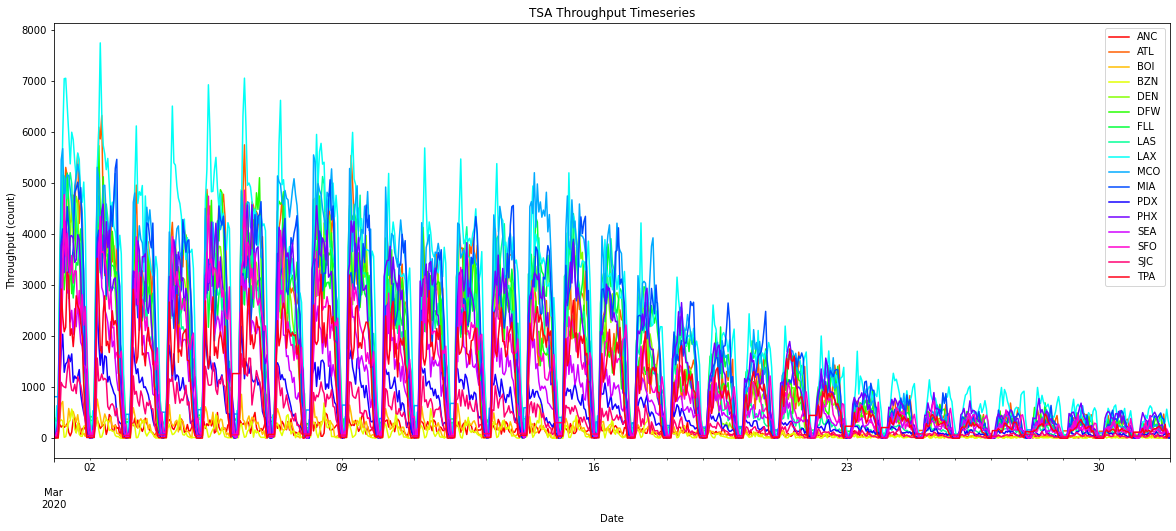

In [95]:
plot_timeseries(df.loc['03-2020'], cmap='hsv')

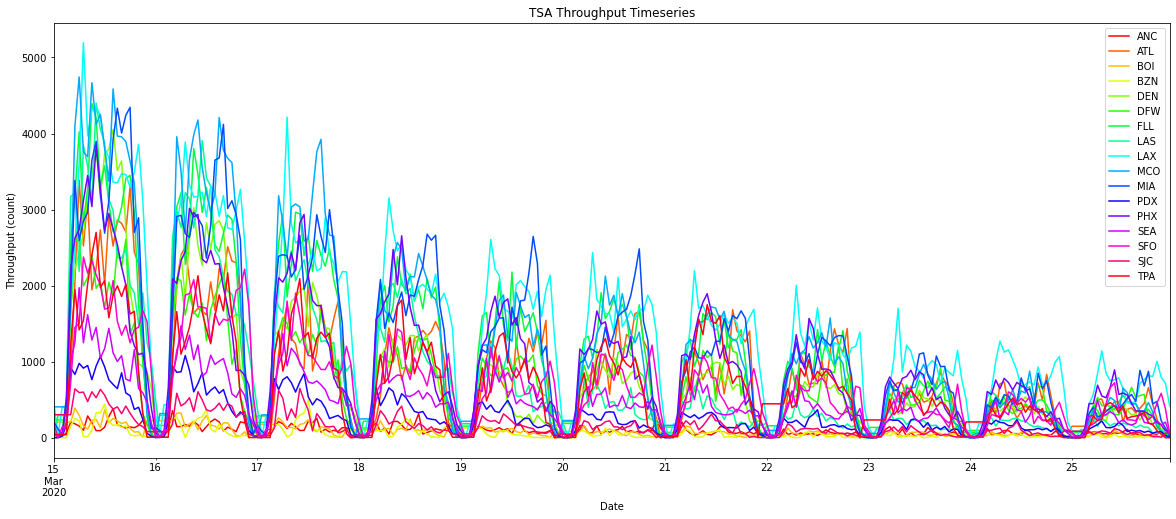

In [96]:
plot_timeseries(df.loc['15-03-2020':'25-03-2020'], cmap='hsv')

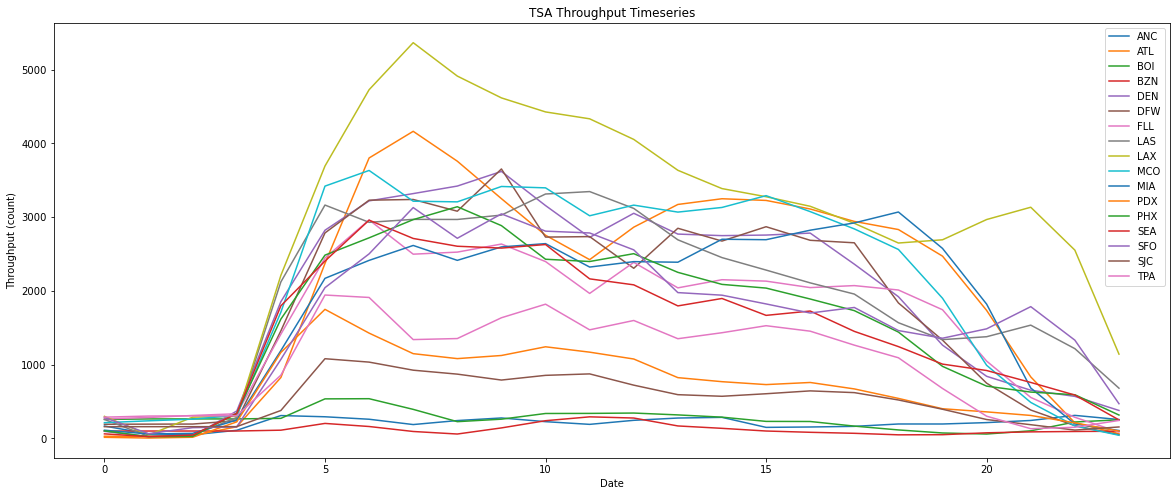

In [97]:
new_index = df.index.hour
new_df = df.groupby(new_index).mean()
plot_timeseries(new_df)

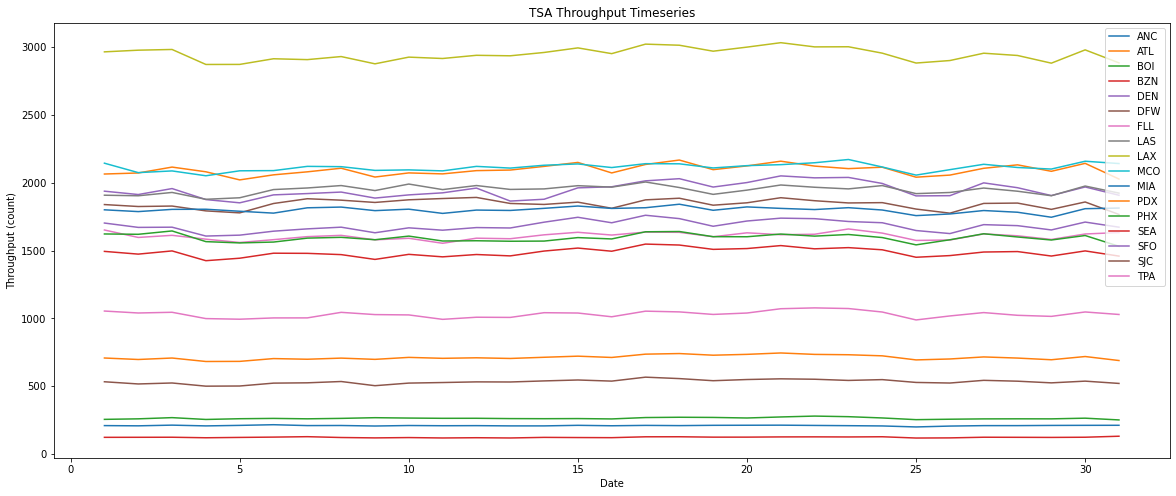

In [98]:
new_index = df.index.day
new_df = df.groupby(new_index).mean()
plot_timeseries(new_df)

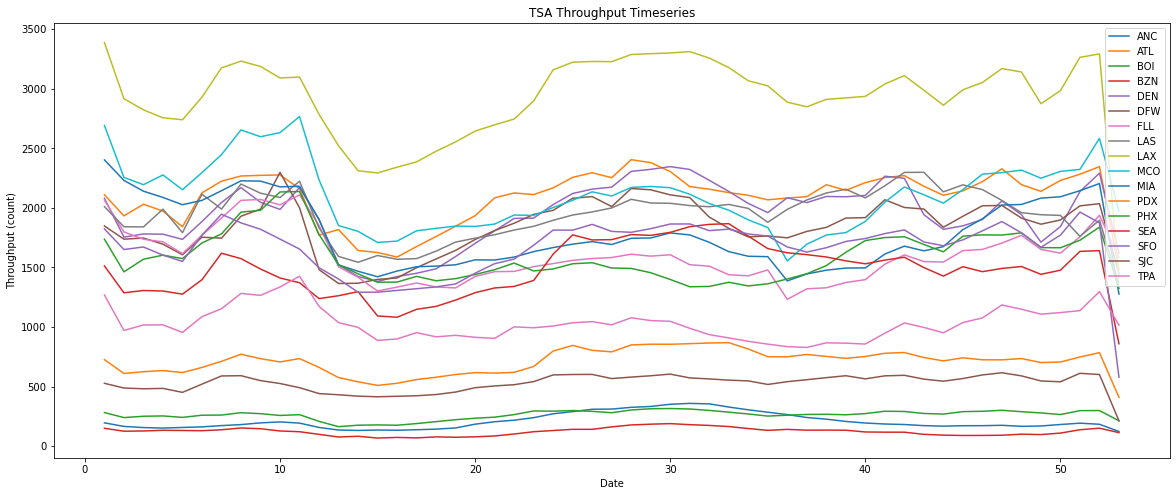

In [99]:
new_index = df.index.isocalendar().week
new_df = df.groupby(new_index).mean()
plot_timeseries(new_df)

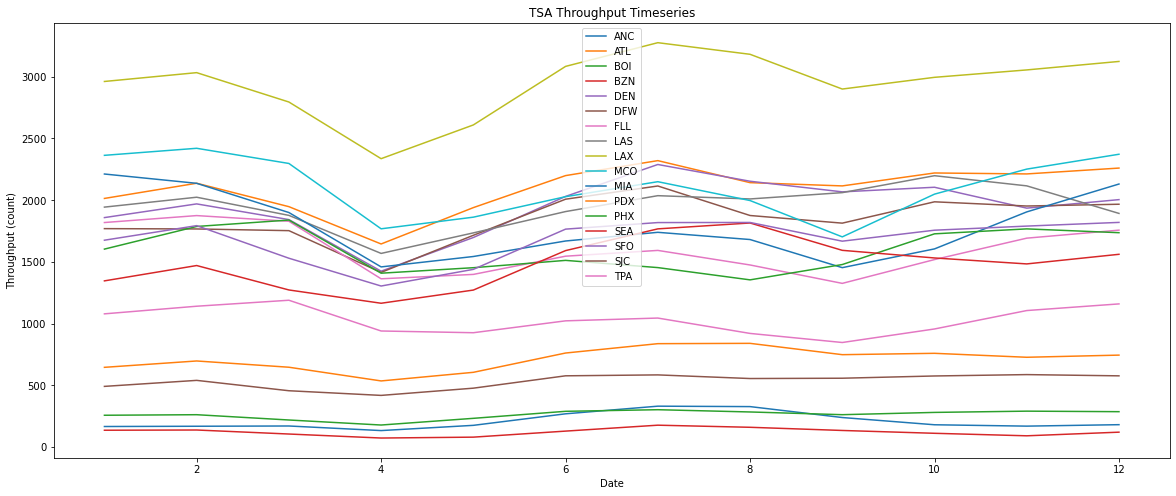

In [100]:
new_index = df.index.month
new_df = df.groupby(new_index).mean()
plot_timeseries(new_df)

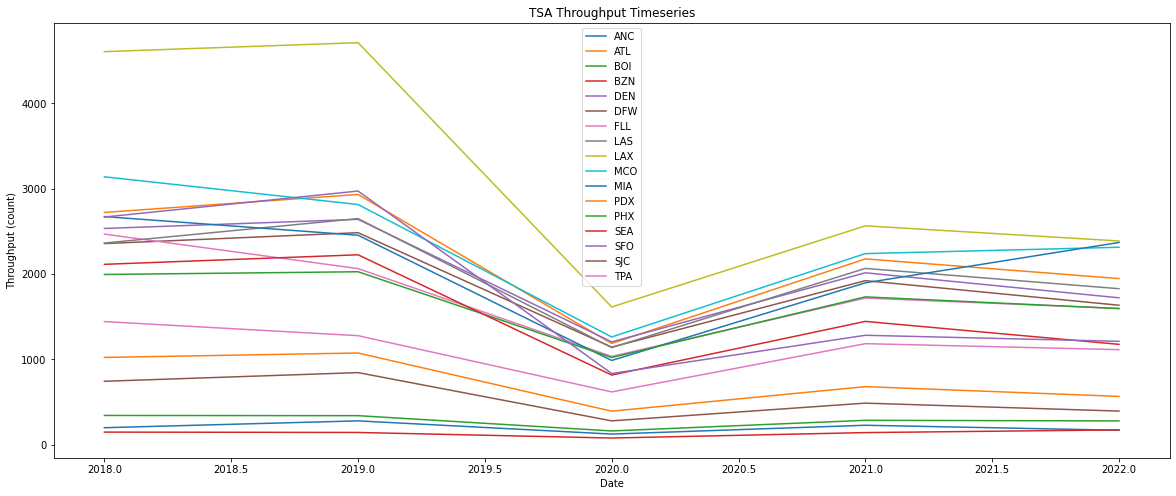

In [101]:
new_index = df.index.year
new_df = df.groupby(new_index).mean()
plot_timeseries(new_df)

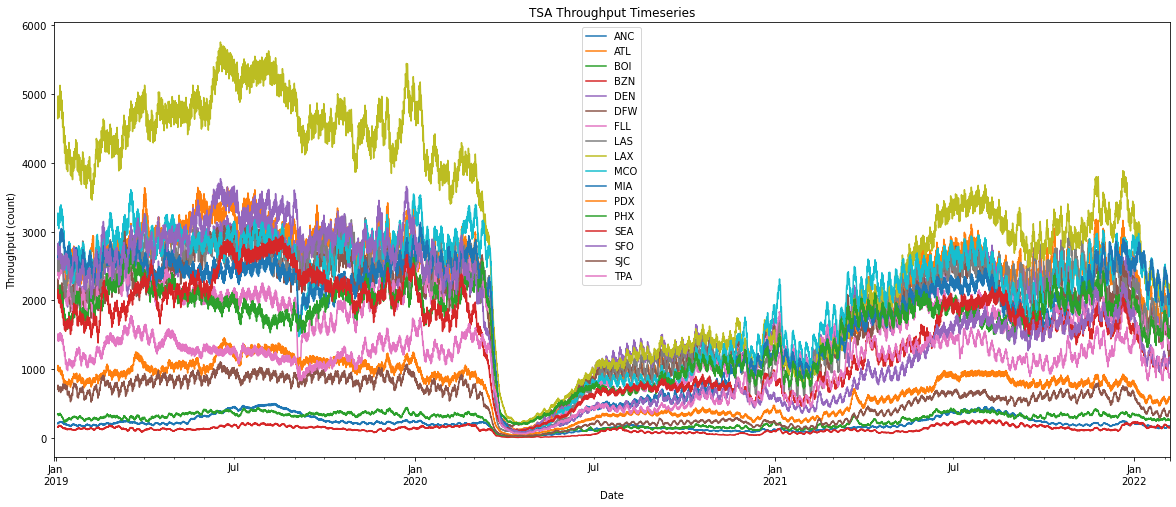

In [102]:
plot_timeseries(df.rolling(window=100).mean())

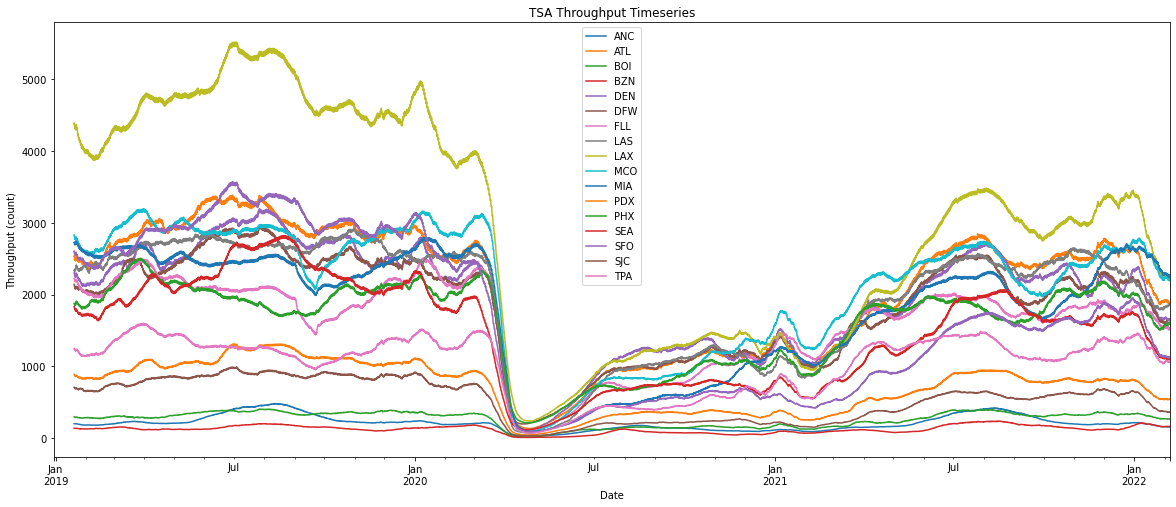

In [103]:
plot_timeseries(df.rolling(window=500).mean())